<a href="https://colab.research.google.com/github/anuragsh31/imageClassificationUsingCNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras  import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

training sample = 50000, 32*32 image, 3 rgb channels

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

3D array and 32*32

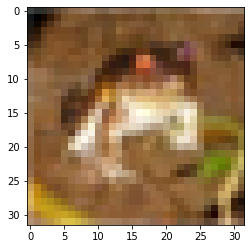

In [ ]:
plt.imshow(X_train[0])

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]  # 6 means frog

array([6], dtype=uint8)

In [ ]:
y_train[:-5]

array([6, 9, 9, ..., 0, 1, 0], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:-5]

array([6, 9, 9, ..., 0, 1, 0], dtype=uint8)

In [ ]:
def plot_sample(X,y, index):

  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


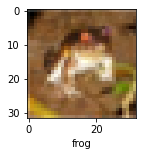

In [ ]:
plot_sample(X_train, y_train,0)

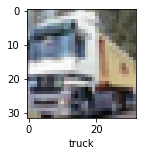

In [ ]:
plot_sample(X_train, y_train,1)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='sigmoid')

])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.8120 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.6218 - accuracy: 0.4293
Epoch 3/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.5406 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4800 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4315 - accuracy: 0.4979


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.5069 - accuracy: 0.4689


[1.5069401264190674, 0.46889999508857727]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report:', classification_report(y_test,y_pred_classes
                                                      ))

Classification Report:               precision    recall  f1-score   support

           0       0.73      0.38      0.50      1000
           1       0.68      0.55      0.61      1000
           2       0.43      0.28      0.34      1000
           3       0.27      0.61      0.37      1000
           4       0.44      0.42      0.43      1000
           5       0.42      0.31      0.36      1000
           6       0.59      0.42      0.50      1000
           7       0.43      0.67      0.52      1000
           8       0.55      0.68      0.61      1000
           9       0.68      0.36      0.47      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.47     10000
weighted avg       0.52      0.47      0.47     10000



ANN is  not working well

In [ ]:
cnn=models.Sequential([
    
    #cnn
    layers.Conv2D(filters=32,activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #cnn2
    layers.Conv2D(filters=64,activation='relu', kernel_size=(3,3), input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [ ]:
cnn.fit(X_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4922 - accuracy: 0.4610
Epoch 2/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1325 - accuracy: 0.6024
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0050 - accuracy: 0.6499
Epoch 4/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9287 - accuracy: 0.6790
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8627 - accuracy: 0.6988


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9580 - accuracy: 0.6714


[0.9579781293869019, 0.6714000105857849]

In [ ]:
y_test=y_test.reshape(-1,)

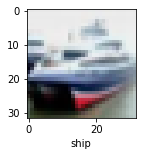

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
y_pred=cnn.predict(X_test)

In [ ]:
y_pred[:5]

array([[2.13612504e-02, 1.23717531e-03, 5.45500219e-03, 7.74342299e-01,
        1.33871171e-03, 1.38083860e-01, 1.50118647e-02, 1.20160810e-03,
        4.03118059e-02, 1.65646314e-03],
       [5.69612496e-02, 6.40783370e-01, 4.76789537e-05, 1.15000339e-05,
        1.29862365e-05, 1.32479818e-06, 2.09755194e-06, 2.84647422e-06,
        2.89171785e-01, 1.30051468e-02],
       [1.91866383e-01, 3.95597428e-01, 4.41751769e-03, 3.26200947e-02,
        1.81737624e-03, 2.27820966e-03, 6.00580452e-03, 2.20323005e-03,
        3.34887922e-01, 2.83060651e-02],
       [8.33722472e-01, 2.41419114e-02, 3.76493745e-02, 3.39169777e-03,
        8.01409222e-03, 7.85201337e-05, 1.70768320e-03, 6.56879740e-04,
        8.98213089e-02, 8.16042302e-04],
       [3.31093848e-04, 2.57880136e-04, 1.90038495e-02, 4.31713551e-01,
        1.56346232e-01, 4.87907156e-02, 3.40735853e-01, 1.09983271e-03,
        1.63131033e-03, 8.96927304e-05]], dtype=float32)

In [ ]:
np.argmax([5,1,12,1,2])

2

In [ ]:
np.argmax(y_pred[0])

3

In [ ]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 3]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

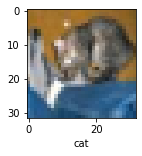

In [ ]:
plot_sample(X_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'

This is a real output between Y_pred and y_test.
for labal o it predict fine but for label 1 it predict diffrent.

In [ ]:
print ('Classification Report:', classification_report(y_test ,y_classes))

Classification Report:               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.77      0.83      0.80      1000
           2       0.56      0.59      0.57      1000
           3       0.48      0.59      0.53      1000
           4       0.74      0.44      0.55      1000
           5       0.63      0.52      0.57      1000
           6       0.72      0.77      0.74      1000
           7       0.67      0.76      0.71      1000
           8       0.75      0.78      0.76      1000
           9       0.81      0.69      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

